In [1]:
%cd ..

/home/pcallens/music-parameters-estimation


In [2]:
from utils.mfcc import *
from librosa import display
import matplotlib.pyplot as plt

/home/pcallens/miniconda3/envs/kerasenv/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/home/pcallens/miniconda3/envs/kerasenv/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit

Bad key "text.kerning_factor" on line 4 in
/home/pcallens/miniconda3/envs/kerasenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mpls

In [3]:
def compute_norm_mfcc_3(signal,sr):
    signal = feature_normalize(signal)
    #mfcc = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=40, hop_length=256, n_fft=512)
    mfcc = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=40, hop_length=int(0.016*sr), n_fft=int(0.04*sr))
    #mfcc = librosa.util.fix_length(mfcc, size = 645, axis=1, mode='wrap') #Reshape to windom size
    mfcc = librosa.util.normalize(mfcc, axis=1)
    return mfcc

def plot_mfcc(mfcc,title,sr,hop_len):
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfcc, sr=sr, hop_length= hop_len, 
                             x_axis='time', y_axis='mel')
    plt.colorbar()
    plt.title('Log-frequency power spectrogram ' + title)
    plt.tight_layout()
    plt.show()
    

In [15]:
sr, music = wavfile.read('datasets/final_ds/Train/music_sr16000_c_1_15s/music-jamendo-0124.wav')
rev_sr, rev_music = wavfile.read('datasets/audio/musan_music/music-fma-0000.wav')

mfcc = compute_norm_mfcc(music,sr)
rev_mfcc = compute_norm_mfcc_3(rev_music[:240000],rev_sr)

In [16]:
print(f'revsr = {rev_sr} \nmusicsr = {sr}')

revsr = 16000 
musicsr = 16000


In [17]:
print(f'SHAPES\nmfcc = {mfcc.shape} \nrevmfcc = {rev_mfcc.shape}')

SHAPES
mfcc = (40, 1500) 
revmfcc = (40, 938)


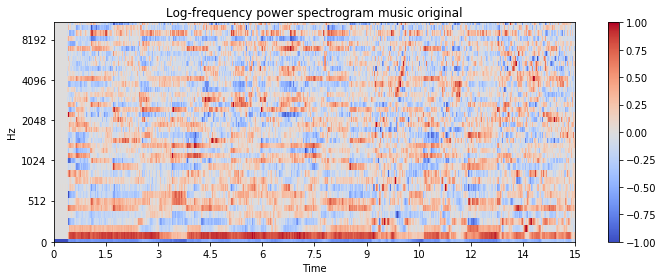

In [18]:
#plot_mfcc(rev_mfcc,'reverberant',rev_sr,256)
plot_mfcc(mfcc,'music original',sr,0.01*sr)

In [19]:
mfcc.shape

(40, 1500)

# From pickle file directly

In [20]:
import pickle

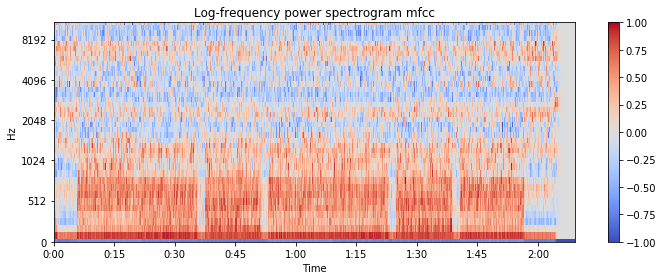

In [40]:
with open('datasets/final_ds/Train/music_mfcc/st-matthews-church-walsall_ir_-_location_1_s1_-_r1/music-fma-0114.pkl','rb') as f:
    mfcc = pickle.load(f)
f.close
plot_mfcc(mfcc,sr=16000,title='mfcc',hop_len=16000*0.01)

In [41]:
mfcc.shape

(40, 12925)

In [15]:
import librosa

In [16]:
fs = 16000
mfcc = librosa.feature.mfcc(sig, sr=fs, n_mfcc=40, hop_length=int(0.010*fs), n_fft=int(0.025*fs))

In [17]:
mfcc.shape

(40, 1501)

In [4]:
0.01*16000

160.0

In [5]:
0.025*16000

400.0

In [7]:
400*16

6400

In [10]:
(16000*15)*0.015

3600.0

In [16]:
15/0.01

1500.0